In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import sem

In [3]:
# Take the raw-data and read it into pandas
clinical_data = os.path.join('raw_data', 'clinicaltrial_data.csv')
mouse_drug_data = os.path.join('raw_data', 'mouse_drug_data.csv')

clinical_df = pd.read_csv(clinical_data)
mouse_drug_df = pd.read_csv(mouse_drug_data)

#Merge clinical and drug data based on Mouse ID
combined_df = pd.merge(clinical_df, mouse_drug_df,
                        how='outer', on='Mouse ID')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
# drop the columns not needed
combined_drop_df = combined_df.drop(["Mouse ID", "Metastatic Sites"], axis =1)
#combined_drop_df = combined_drop_df.set_index("Drug")

#Groupby Drug names
drug_grouped = combined_drop_df.groupby(['Drug', 'Timepoint']).mean()
#drug_grouped.reset_index().head()
drug_grouped.head()
#print (tabulate(drug_grouped,headers="firstrow", tablefmt="fancy_grid"))

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
#Standard Error by Drug and Timepoint
tumor_error = combined_drop_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_error_df = tumor_error.to_frame()
tumor_error_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
type(drug_grouped )

pandas.core.frame.DataFrame

In [7]:
#Pivot table for Drug, Timepoint vs tumor volume
z = pd.pivot_table(drug_grouped, index='Timepoint', columns='Drug')
z

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [8]:
#Using loc for single drug
drug1="Capomulin"
a = drug_grouped.loc[drug1]
a

,Tumor Volume (mm3)
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325
25,39.939528
30,38.769339
35,37.816839
40,36.958001


In [9]:
tumor_error_df.loc["Capomulin"]

,Tumor Volume (mm3)
Timepoint,
0,0.000000
5,0.448593
10,0.702684
15,0.838617
20,0.909731
25,0.881642
30,0.934460
35,1.052241
40,1.223608


In [10]:
tumor_error_df.loc["Capomulin","Tumor Volume (mm3)"]

Timepoint
0     0.000000
5     0.448593
10    0.702684
15    0.838617
20    0.909731
25    0.881642
30    0.934460
35    1.052241
40    1.223608
45    1.223977
Name: Tumor Volume (mm3), dtype: float64

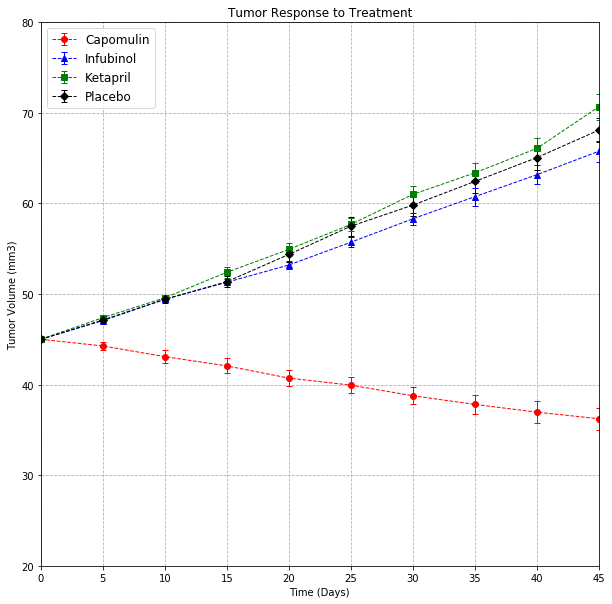

In [11]:
#x-axis
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,10))

#Defining single drug
error = tumor_error_df.loc["Capomulin","Tumor Volume (mm3)"]
capomulin = plt.errorbar(x_axis, drug_grouped.loc["Capomulin","Tumor Volume (mm3)"], yerr=error, fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_error_df.loc["Infubinol","Tumor Volume (mm3)"]
infubinol = plt.errorbar(x_axis, drug_grouped.loc["Infubinol","Tumor Volume (mm3)"] , yerr=error, fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_error_df.loc["Ketapril","Tumor Volume (mm3)"]
ketapril = plt.errorbar(x_axis, drug_grouped.loc["Ketapril","Tumor Volume (mm3)"], yerr=error, fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tumor_error_df.loc["Placebo","Tumor Volume (mm3)"]
placebo = plt.errorbar(x_axis, drug_grouped.loc["Placebo","Tumor Volume (mm3)"], yerr=error, fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes limits
plt.ylim(20, 80)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="dashed")

#Chart Legend 
plt.legend((capomulin, infubinol, ketapril, placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [21]:
#Metastatic sites by Drug
combined_df.groupby("Drug")["Timepoint"].count()
metastatic_response_df = combined_df.groupby(["Drug", "Timepoint"])
metastatic_response_df_2 = metastatic_response_df["Metastatic Sites"].mean().to_frame()
metastatic_response_df_2.head(10)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190

In [20]:
#Standard Error by Drug and Timepoint
metastatic_response_error = combined_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
metastatic_response_error_df = metastatic_response_error.to_frame()
metastatic_response_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591

In [14]:
#Pivot table for Drug, Timepoint vs metastatic sites
l = pd.pivot_table(metastatic_response_df_2, index='Timepoint', columns='Drug')
l

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

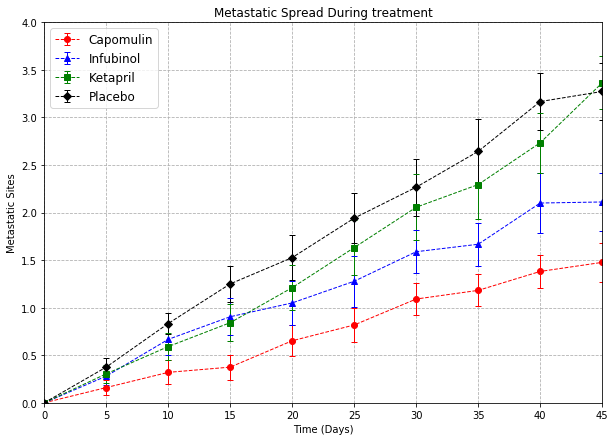

In [23]:
#x-axis
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

#Defining single drug
error1 = metastatic_response_error_df.loc["Capomulin","Metastatic Sites"]
capomulin1 = plt.errorbar(x_axis, metastatic_response_df_2.loc["Capomulin","Metastatic Sites"], yerr=error1, fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)

error1 = metastatic_response_error_df.loc["Infubinol","Metastatic Sites"]
infubinol1 = plt.errorbar(x_axis, metastatic_response_df_2.loc["Infubinol","Metastatic Sites"], yerr=error1, fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)

error1 = metastatic_response_error_df.loc["Ketapril","Metastatic Sites"]
ketapril1 = plt.errorbar(x_axis, metastatic_response_df_2.loc["Ketapril","Metastatic Sites"], yerr=error1, fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)

error1 = metastatic_response_error_df.loc["Placebo","Metastatic Sites"]
placebo1 = plt.errorbar(x_axis, metastatic_response_df_2.loc["Placebo","Metastatic Sites"], yerr=error1, fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes limits
plt.ylim(0, 4)
plt.xlim(0, 45)

#Axes and Chart Labels
plt.title("Metastatic Spread During treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid(linestyle="dashed")

#Chart Legend 
plt.legend((capomulin1, infubinol1, ketapril1, placebo1), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [16]:
#Surival rate
combined_df.groupby("Drug")["Timepoint"].count()
mouse_count_df = combined_df.groupby(["Drug", "Timepoint"])
mouse_count_df_2 = mouse_count_df["Mouse ID"].count().to_frame()
name_changed_df = mouse_count_df_2.rename(columns={'Mouse ID': 'Mouse Count'})
name_changed_df.head()                        

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [17]:
#Pivot table for Drug, Timepoint vs num. of mouse survived 
k = pd.pivot_table(name_changed_df, index='Timepoint', columns='Drug')
k

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

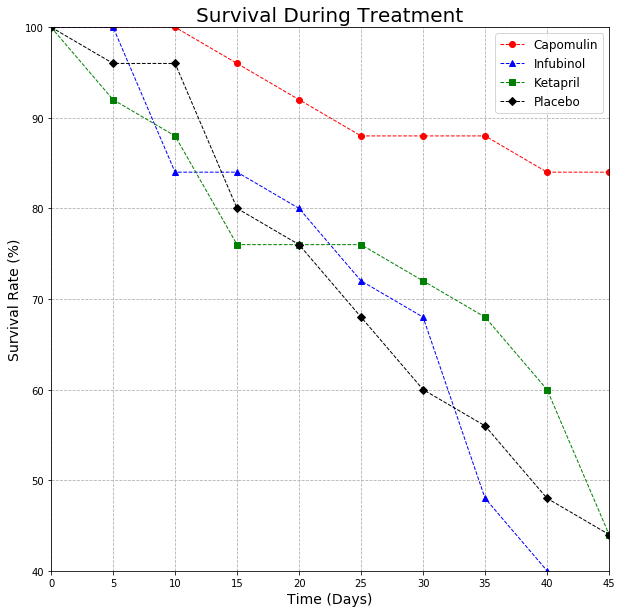

In [25]:
#Creating the Plot
plt.figure(figsize=(10,10))
#For single drug
capomulin2 = plt.errorbar(x_axis, (name_changed_df.loc["Capomulin", "Mouse Count"]/25*100), fmt="o", color="red", ls="dashed", linewidth=1, alpha=1, capsize=3)
infubinol2 = plt.errorbar(x_axis, (name_changed_df.loc["Infubinol", "Mouse Count"]/25*100), fmt="^", color="blue", ls="dashed", linewidth=1, alpha=1, capsize=3)
ketapril2 = plt.errorbar(x_axis, (name_changed_df.loc["Ketapril", "Mouse Count"]/25*100), fmt="s", color="green", ls="dashed", linewidth=1, alpha=1, capsize=3)
placebo2 = plt.errorbar(x_axis, (name_changed_df.loc["Placebo", "Mouse Count"]/25*100), fmt="D", color="black", ls="dashed", linewidth=1, alpha=1, capsize=3)

#Axes Limits
plt.ylim(40, 100)
plt.xlim(0, 45)
#Axes and Chart Labels
plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)
plt.grid(linestyle="dashed")
#Chart Legend
plt.legend((capomulin2, infubinol2, ketapril2, placebo2), ("Capomulin","Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [33]:
u = drug_grouped.unstack(0)
u

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [34]:
#Summary
summary_df=((u.iloc[9,:]-u.iloc[0,:])*100/u.iloc[0,:]).to_frame().rename(columns={0:"Percent Tumor Change"})
summary_df

Percent Tumor Change
                   Drug                           
Tumor Volume (mm3) Capomulin            -19.475303
                   Ceftamin              42.516492
                   Infubinol             46.123472
                   Ketapril              57.028795
                   Naftisol              53.923347
                   Placebo               51.297960
                   Propriva              47.241175
                   Ramicane             -22.320900
                   Stelasyn              52.085134
                   Zoniferol             46.579751

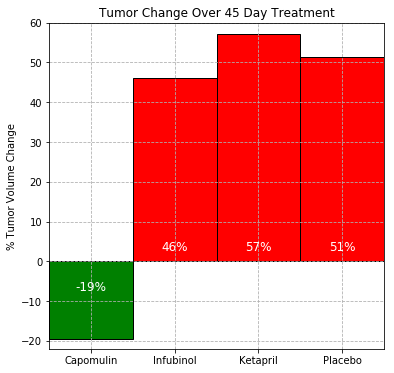

In [42]:
#summary bar graph
plt.figure(figsize=(6,6))

#For 4 drugs
capomulin3 = plt.bar(0, summary_df["Percent Tumor Change"][0], color='green', alpha=1, align="edge", ec="black", width=1)
infubinol3 = plt.bar(1, summary_df["Percent Tumor Change"][2], color='red', alpha=1, align="edge", ec="black", width=1)
ketapril3 = plt.bar(2, summary_df["Percent Tumor Change"][3], color='red', alpha=1, align="edge", ec="black", width=1)
placebo3 = plt.bar(3, summary_df["Percent Tumor Change"][5], color='red', alpha=1, align="edge", ec="black", width=1)

def label(graphs):
 for graph in graphs:
    height = graph.get_height()
    plt.text(graph.get_x() + graph.get_width()/2., -8,'%d' % int(height) + "%", ha='center', va='bottom', color='white', fontsize=12)
label(capomulin3)
def label(graphs):
 for graph in graphs:
    height = graph.get_height()
    plt.text(graph.get_x() + graph.get_width()/2., 2,'%d' % int(height) + "%",ha='center', va='bottom', color='white', fontsize=12)
label(infubinol3)
label(ketapril3)
label(placebo3)
#declare axis
xvalues=["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x_axis1 = np.arange(0,len(xvalues),1)
tick_locations = [value+0.5 for value in x_axis1]
plt.xticks(tick_locations, (xvalues))
plt.grid(linestyle="dashed")
#Axes Limits
plt.xlim(0, 4)
plt.ylim(-22, 60)
#Axes and Chart Labels
plt.title("Tumor Change Over 45 Day Treatment", fontsize=12)
plt.ylabel("% Tumor Volume Change")
plt.show()